<a href="https://colab.research.google.com/github/jamshid-ds/clustering-twosmall_projects/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/jamshid-ds/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.90913822,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
k = 3
k_means = KMeans(n_clusters = k) # init va n_init standart qiymatlarni qabul qiladi, biz faqat klasterlar sonini ko'rsatdik.
k_means.fit(norm_data)
print(k_means.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

In [ ]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
df.groupby('cluster').mean()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


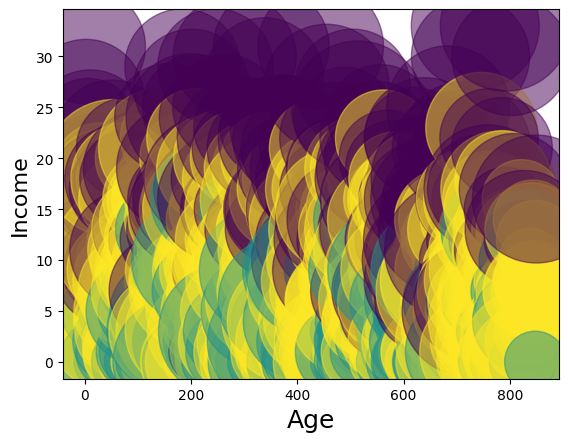

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()